In [ ]:
!pip install factor_analyzer

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
from factor_analyzer import factor_analyzer
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/stickleback.csv',sep=';',decimal=',')
df.head(5)

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df.filter(regex='^(?!.*Unnamed).*$')
df.head(5)

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0


In [ ]:
df.describe()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,131.185185,69.055556,7.277778,1.425926,18.425926,34.259259,89.314815
std,50.771064,43.428283,6.693891,3.000641,8.712606,56.491170,98.679742
min,41.000000,3.000000,0.000000,0.000000,5.000000,0.000000,6.000000
25%,99.000000,34.250000,2.250000,0.000000,14.000000,0.000000,23.500000
50%,127.000000,60.000000,5.000000,0.000000,16.000000,0.000000,45.000000
75%,156.750000,84.250000,10.750000,1.000000,24.750000,73.000000,125.000000
max,277.000000,175.000000,26.000000,15.000000,46.000000,199.000000,306.000000


In [ ]:
df.corr()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
LUNGES,1.000000,0.688077,-0.139336,-0.164133,0.055567,-0.228568,0.233314
BITES,0.688077,1.000000,-0.042761,-0.148884,0.373382,-0.217563,0.117316
ZIGZAGS,-0.139336,-0.042761,1.000000,0.351894,0.067813,0.091315,-0.160693
NEST,-0.164133,-0.148884,0.351894,1.000000,-0.052538,0.514028,-0.305876
SPINES,0.055567,0.373382,0.067813,-0.052538,1.000000,-0.051099,-0.041483
DNEST,-0.228568,-0.217563,0.091315,0.514028,-0.051099,1.000000,-0.242177
BOUT,0.233314,0.117316,-0.160693,-0.305876,-0.041483,-0.242177,1.000000


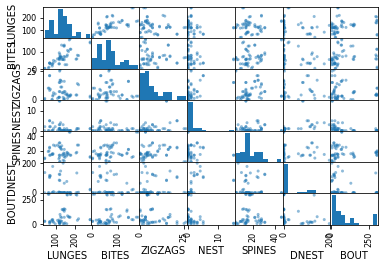

In [ ]:
scatter_matrix(df);

In [ ]:
chi,p_value=factor_analyzer.calculate_bartlett_sphericity(df)
chi,p_value

(78.65570932525837, 1.3528985212723955e-08)

In [ ]:
kmo_all, kmo_model = factor_analyzer.calculate_kmo(df)

In [ ]:
kmo_all

array([0.5045225 , 0.49499775, 0.54613696, 0.5818407 , 0.3460975 ,
       0.62519322, 0.76803628])

In [ ]:
kmo_model

0.536090482930058

In [ ]:
df_scaled=scale(df)

In [ ]:
print(df_scaled[0:5,:])

[[-1.03750432 -1.02396939 -1.09743575 -0.47966932 -0.39690707 -0.61214787
  -0.4532939 ]
 [ 0.09572432 -0.25696079 -0.19267956 -0.47966932 -0.39690707 -0.61214787
   0.60028766]
 [-0.32178097 -0.90775596 -0.79585035 -0.14327785 -1.09203081 -0.52280737
  -0.61695706]
 [-0.04344411  1.62569667  1.31524742 -0.47966932  0.41407062 -0.61214787
  -0.20779917]
 [-0.22237495 -0.25696079  1.16445472  4.56620276 -0.51276103  0.85303633
  -0.82153601]]


In [ ]:
pca=PCA(n_components=7)

In [ ]:
pca.fit(df_scaled)

PCA(n_components=7)

In [ ]:
pca.explained_variance_ #Собственные числа 

array([2.33131423, 1.48167964, 0.99758804, 0.90279779, 0.76745194,
       0.41244602, 0.2387978 ])

In [ ]:
pca.explained_variance_ratio_ #Объясненную дисперсию 

array([0.32687739, 0.20774873, 0.13987346, 0.12658276, 0.1076057 ,
       0.05782973, 0.03348223])

In [ ]:
v=0
for i in pca.explained_variance_ratio_:
  v+=i
  print(v)

0.3268773917679257
0.5346261250218028
0.6744995808365255
0.8010823391610432
0.9086880347421142
0.9665177682091353
0.9999999999999999


In [ ]:
fa=FactorAnalyzer()

In [ ]:
fa.fit(df_scaled)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
eigen_values,vectors=fa.get_eigenvalues()
eigen_values

array([2.28814174, 1.45424113, 0.97911419, 0.88607931, 0.75323987,
       0.40480813, 0.23437562])

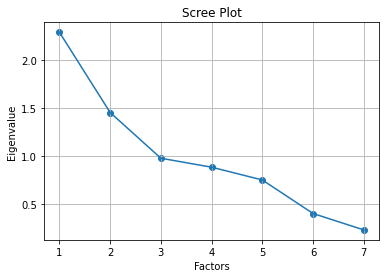

In [ ]:
plt.scatter(range(1,df_scaled.shape[1]+1),eigen_values)
plt.plot(range(1,df_scaled.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa.set_params(n_factors= 3, rotation='varimax')

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
fa.fit(df_scaled)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
loadings=pd.DataFrame(fa.loadings_,columns=['factor_1','factor_2','factor_3'],index=df.columns)
loadings

,factor_1,factor_2,factor_3
LUNGES,-0.213815,0.876088,0.022384
BITES,-0.110001,0.742419,0.588652
ZIGZAGS,0.342123,-0.076383,0.107402
NEST,0.989281,0.058242,-0.141253
SPINES,0.025750,0.057196,0.564226
DNEST,0.501341,-0.134760,-0.111540
BOUT,-0.359746,0.185878,-0.089865


In [ ]:
fa.set_params(n_factors= 2, rotation='varimax')

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [ ]:
fa.fit(df_scaled)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [ ]:
loadings=pd.DataFrame(fa.loadings_,columns=['factor_1','factor_2'],index=df.columns)
loadings

,factor_1,factor_2
LUNGES,0.623123,-0.242540
BITES,1.007741,-0.128163
ZIGZAGS,0.000196,0.355506
NEST,-0.015454,0.894196
SPINES,0.294315,0.018574
DNEST,-0.155512,0.536576
BOUT,0.099458,-0.384636


In [ ]:
fa.get_communalities() #общность (часть дисперсии переменной, объясненной факторами)

array([0.4471078 , 1.03196785, 0.1263845 , 0.79982593, 0.08696602,
       0.31209807, 0.15783688])

In [ ]:
fa.get_uniquenesses() # уникальность (часть дисперсии переменной, объясненной уникальными факторами

array([ 0.5528922 , -0.03196785,  0.8736155 ,  0.20017407,  0.91303398,
        0.68790193,  0.84216312])

In [ ]:
fa.get_communalities()+fa.get_uniquenesses()

array([1., 1., 1., 1., 1., 1., 1.])

In [ ]:
var=pd.DataFrame(fa.get_factor_variance(),columns=['factor_1','factor_2'],index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])
var

,factor_1,factor_2
SS Loadings,1.524760,1.437427
Proportion Var,0.217823,0.205347
Cumulative Var,0.217823,0.423170


In [ ]:
scores=pd.DataFrame(fa.fit_transform(df_scaled),columns=['factor_1','factor_2'])
scores.head()

,factor_1,factor_2
0,-1.056267,-0.414067
1,-0.312892,-0.554501
2,-0.914928,-0.217825
3,1.815168,-0.179745
4,0.413355,3.843151


In [ ]:
scores.corr()

,factor_1,factor_2
factor_1,1.000000,-0.004571
factor_2,-0.004571,1.000000
